# Updating the Existing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('/content/final_property_data_chennai_realistic_streets_final.xlsx')

In [3]:
data

,Location,Street,Latitude,Longitude,Area (sq ft),Year Built,Property Type,Nearby Famous Locations,Crime Rate,Public Transport Accessibility,Water Facility,Near Hospital Location,Land Price (Rupees),Building Price (Rupees),Total Price (Rupees)
0,Adyar,Sterling Road,13.024516,80.058852,3080,1982,Townhouse,"Valluvar Kottam, Valluvar Kottam",97.070642,Low,Available,Chandler-Morris,9439177,5346336,14785513
1,Velachery,Gandhi Mandapam Road,12.917998,80.278331,2165,1952,Condo,"Hindu Mission Hospital, Tambaram Railway Station",6.685348,Low,Not Available,"Johns, Ford and Marshall",1423341,12168421,13591762
2,Guindy,RK Mutt Road,12.928471,80.297199,4547,1913,Single Family,"Liberty Theater, Valluvar Kottam",38.331055,High,Available,Lawson-Harrison,10969677,11687269,22656946
3,Velachery,Greenways Road,12.915734,80.027921,4493,2014,Condo,"Phoenix Market City, Phoenix Market City",60.330256,Low,Available,Crosby Inc,17678825,12964009,30642834
4,Nungambakkam,Periyar EVR Road,12.889303,80.172369,3329,1929,Single Family,"Gandhi Nagar, Adyar Bridge",77.661060,Low,Available,Wang-Freeman,16510644,4283409,20794053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Guindy,Cathedral Road,12.945212,80.135248,4959,2017,Condo,"VR Mall, VR Mall",45.331091,Medium,Not Available,West-Olson,2619183,20843663,23462846
996,Tambaram,Greenways Road,13.143440,80.121124,4288,1935,Plot,"Vadapalani Murugan Temple, Vadapalani Murugan ...",58.452051,Low,Not Available,Russo Ltd,9222397,3254267,9222397
997,T. Nagar,Cathedral Road,13.154285,80.056696,2138,1976,Condo,"Independence Day Park, Independence Day Park",22.831114,High,Available,Shelton Ltd,7010622,6239606,13250228
998,Velachery,Periyar EVR Road,13.053073,80.253417,3641,1966,Multi Family,"Independence Day Park, Independence Day Park",34.806893,High,Not Available,"Evans, Stephens and Cisneros",10496059,7365383,17861442


# Generating the Synthetic Data

In [4]:
hospital_names = data['Near Hospital Location'].unique()

In [5]:
street_names = [
    'Anna Salai', 'Mount Road', 'RK Mutt Road', 'Arcot Road', 'Poonamallee High Road',
    'TTK Road', 'Whites Road', 'Nungambakkam High Road', 'Nelson Manickam Road',
    'Royapettah High Road', 'Chamiers Road', 'Besant Avenue Road', 'Gandhi Mandapam Road',
    'CIT Nagar', 'Haddows Road', 'Cathedral Road', 'Sterling Road', 'Periyar EVR Road',
    'Greenways Road', 'Adithanar Road', 'Pantheon Road'
]

In [6]:
famous_locations_dict = {
    'Porur': ['Sri Ramachandra Hospital', 'DLF IT Park', 'L&T', 'Porur Lake'],
    'Anna Nagar': ['Anna Nagar Tower', 'VR Mall', 'Shanthi Colony', 'Blue Star'],
    'T. Nagar': ['Pothys', 'Nalli Silks', 'Panagal Park', 'Ranganathan Street'],
    'Adyar': ['Elliots Beach', 'Theosophical Society', 'Gandhi Nagar', 'Adyar Bridge'],
    'Velachery': ['Phoenix Market City', 'Velachery Lake', 'Taramani Link Road', 'Grand Mall'],
    'Guindy': ['Guindy National Park', 'Raj Bhavan', 'Kathipara Junction', 'CIPET'],
    'Mylapore': ['Kapaleeshwarar Temple', 'San Thome Basilica', 'Luz Church Road', 'Ramakrishna Mutt'],
    'Kodambakkam': ['Liberty Theater', 'Valluvar Kottam', 'Arcot Road', 'Vadapalani Murugan Temple'],
    'Nungambakkam': ['Valluvar Kottam', 'Sterling Road', 'Loyola College', 'Independence Day Park'],
    'Tambaram': ['Tambaram Railway Station', 'MCC College', 'Camp Road', 'Hindu Mission Hospital']
}


In [7]:
def generate_property_data(num_rows):
    locations = list(famous_locations_dict.keys())
    data = {
        'Location': np.random.choice(locations, num_rows),
        'Street': np.random.choice(street_names, num_rows),
        'Latitude': np.random.uniform(12.8200, 13.1800, num_rows),
        'Longitude': np.random.uniform(80.0100, 80.3000, num_rows),
        'Area (sq ft)': np.random.randint(500, 5000, num_rows),
        'Year Built': np.random.randint(1900, 2024, num_rows),
        'Property Type': np.random.choice(['Single Family', 'Condo', 'Townhouse', 'Multi Family', 'Plot'], num_rows),
        'Nearby Famous Locations': [', '.join(np.random.choice(famous_locations_dict[loc], 2)) for loc in np.random.choice(locations, num_rows)],
        'Crime Rate': np.random.uniform(0, 100, num_rows),
        'Public Transport Accessibility': np.random.choice(['High', 'Medium', 'Low'], num_rows),
        'Water Facility': np.random.choice(['Available', 'Not Available'], num_rows),
        'Near Hospital Location': np.random.choice(hospital_names, num_rows),  # Using hospital names from the previous dataset
        'Land Price (Rupees)': np.random.randint(500000, 20000000, num_rows),
        'Building Price (Rupees)': np.random.randint(0, 30000000, num_rows),
    }

    data['Total Price (Rupees)'] = np.where(data['Property Type'] == 'Plot',
                                            data['Land Price (Rupees)'],
                                            data['Land Price (Rupees)'] + data['Building Price (Rupees)'])

    data = pd.DataFrame(data)

    return data


# Saving the Data to Excel Format

In [8]:
num_rows = 1000

df_chennai = generate_property_data(num_rows)

output_file_path = 'final_property_data_chennai_realistic_sample.xlsx'
df_chennai.to_excel(output_file_path, index=False, engine='openpyxl')

print(f"Data saved to {output_file_path}")


Data saved to final_property_data_chennai_realistic_sample.xlsx


# Training the Model for Property Price Evaluation

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Reading the Excel File

In [10]:
data = pd.read_excel('final_property_data_chennai_realistic_streets.xlsx')

In [11]:
data.head()

,Location,Street,Latitude,Longitude,Area (sq ft),Year Built,Property Type,Nearby Famous Locations,Crime Rate,Public Transport Accessibility,Water Facility,Near Hospital Location,Land Price (Rupees),Building Price (Rupees),Total Price (Rupees)
0,Kodambakkam,Whites Road,13.138831,80.221579,973,1933,Condo,"Arcot Road, Vadapalani Murugan Temple",96.432760,High,Available,Bell and Sons,19207976,169289,19377265
1,Porur,RK Mutt Road,12.960715,80.065563,4171,1902,Condo,"L&T, Sri Ramachandra Hospital",67.389583,High,Available,Wang-Freeman,3816325,11898326,15714651
2,Mylapore,TTK Road,13.062025,80.192469,1747,1937,Townhouse,"Tambaram Railway Station, Tambaram Railway Sta...",61.663088,Medium,Not Available,Martinez-Smith,2366388,14875715,17242103
3,Guindy,Arcot Road,13.086460,80.265951,4328,1979,Townhouse,"Theosophical Society, Gandhi Nagar",17.754009,Low,Not Available,Cantu-Mayer,3244834,13122378,16367212
4,Anna Nagar,Besant Avenue Road,12.843140,80.241177,2523,1979,Multi Family,"Theosophical Society, Elliots Beach",84.357526,Low,Not Available,"Hurley, Schneider and Williams",19326450,11945887,31272337


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        1000 non-null   object 
 1   Street                          1000 non-null   object 
 2   Latitude                        1000 non-null   float64
 3   Longitude                       1000 non-null   float64
 4   Area (sq ft)                    1000 non-null   int64  
 5   Year Built                      1000 non-null   int64  
 6   Property Type                   1000 non-null   object 
 7   Nearby Famous Locations         1000 non-null   object 
 8   Crime Rate                      1000 non-null   float64
 9   Public Transport Accessibility  1000 non-null   object 
 10  Water Facility                  1000 non-null   object 
 11  Near Hospital Location          1000 non-null   object 
 12  Land Price (Rupees)             100

# EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

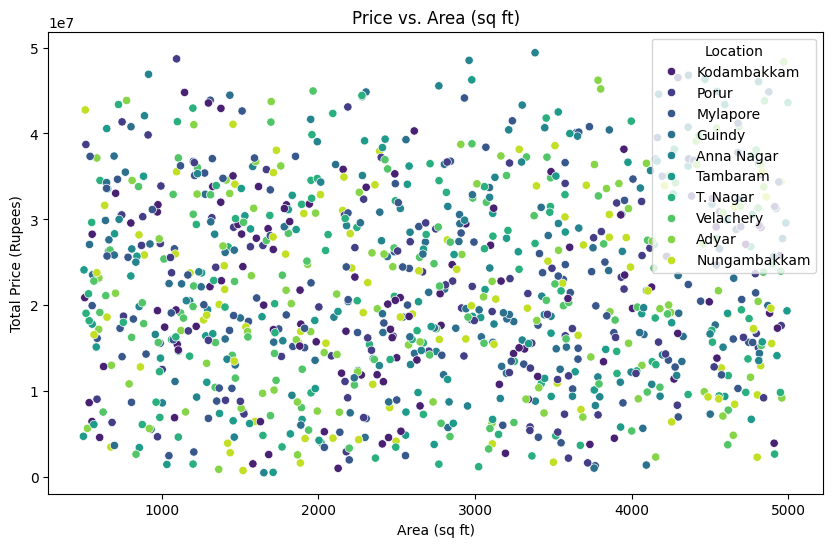

In [14]:
 #1. Scatter Plot: Price vs. Area (sq ft)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area (sq ft)', y='Total Price (Rupees)', data=data, hue='Location', palette='viridis')
plt.title('Price vs. Area (sq ft)')
plt.xlabel('Area (sq ft)')
plt.ylabel('Total Price (Rupees)')
plt.show()


<ipython-input-15-7a44a5944722>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Total Price (Rupees)', data=data, estimator=sum, ci=None)


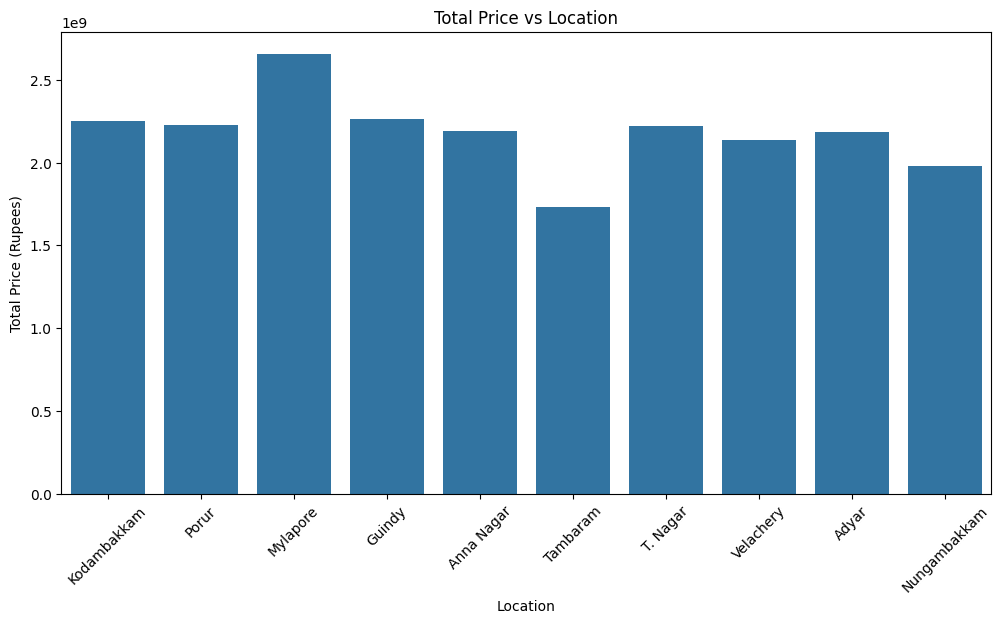

In [15]:
# 2. Total Price vs Location
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Total Price (Rupees)', data=data, estimator=sum, ci=None)
plt.title('Total Price vs Location')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Total Price (Rupees)')
plt.show()

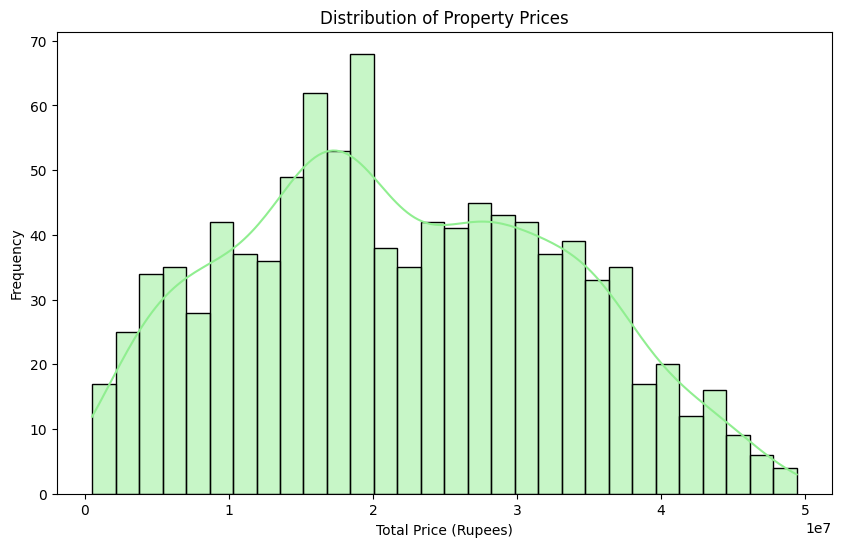

In [16]:
# 3. Distribution of Property Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Price (Rupees)'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Property Prices')
plt.xlabel('Total Price (Rupees)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-3ee391abd2ca>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Property Type', y='Total Price (Rupees)', data=data, estimator=np.mean, ci=None, palette='pastel')
<ipython-input-17-3ee391abd2ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Property Type', y='Total Price (Rupees)', data=data, estimator=np.mean, ci=None, palette='pastel')


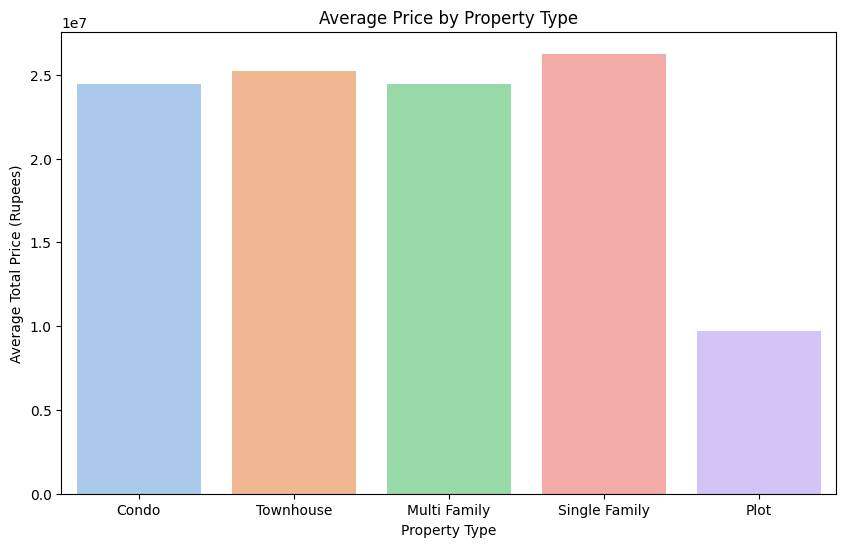

In [17]:

# 4. Price Comparison between Property Types
plt.figure(figsize=(10, 6))
sns.barplot(x='Property Type', y='Total Price (Rupees)', data=data, estimator=np.mean, ci=None, palette='pastel')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Total Price (Rupees)')
plt.show()

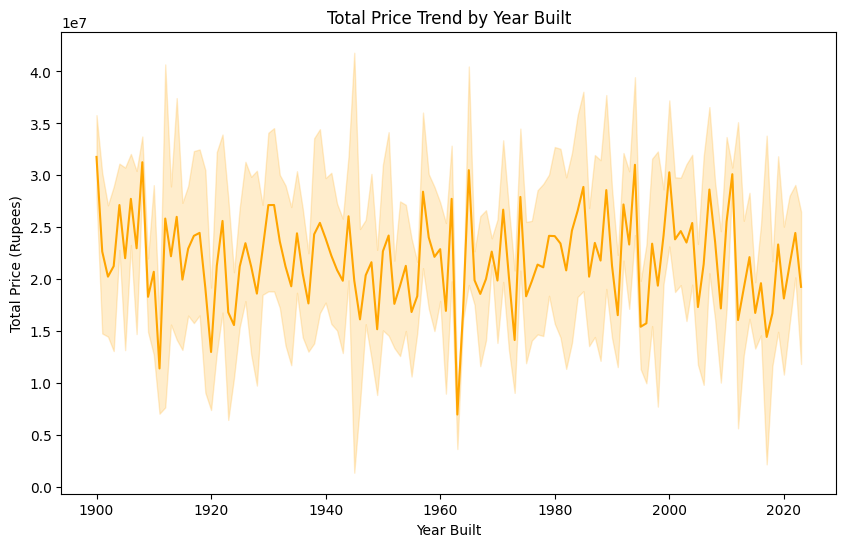

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year Built', y='Total Price (Rupees)', data=data, color='orange')
plt.title('Total Price Trend by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Total Price (Rupees)')
plt.show()

<ipython-input-19-8906226eb733>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Crime Rate', data=data, ci=None)


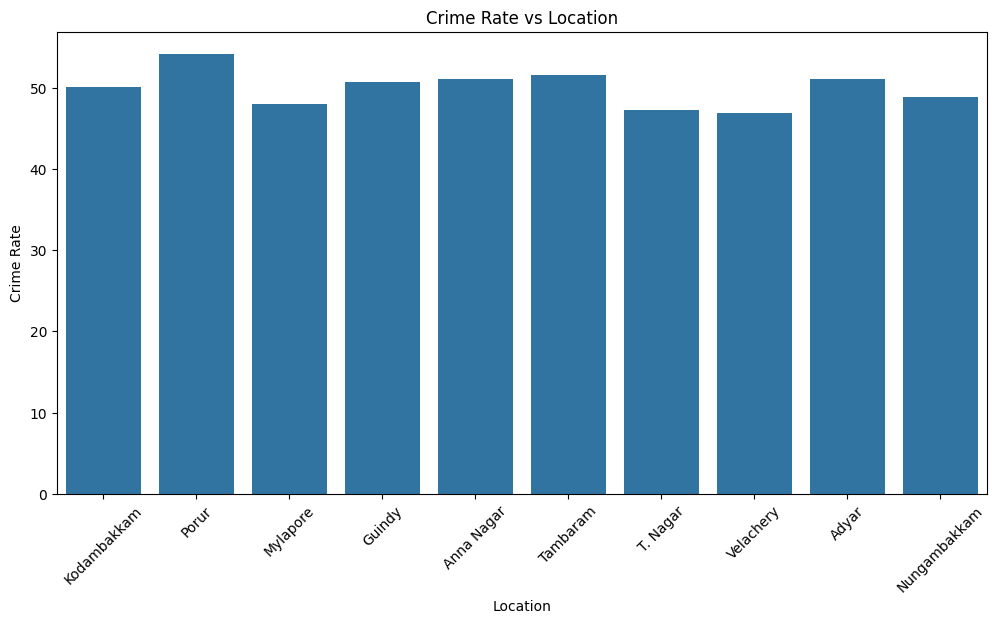

In [19]:
# 5. Crime Rate vs Location
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Crime Rate', data=data, ci=None)
plt.title('Crime Rate vs Location')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Crime Rate')
plt.show()

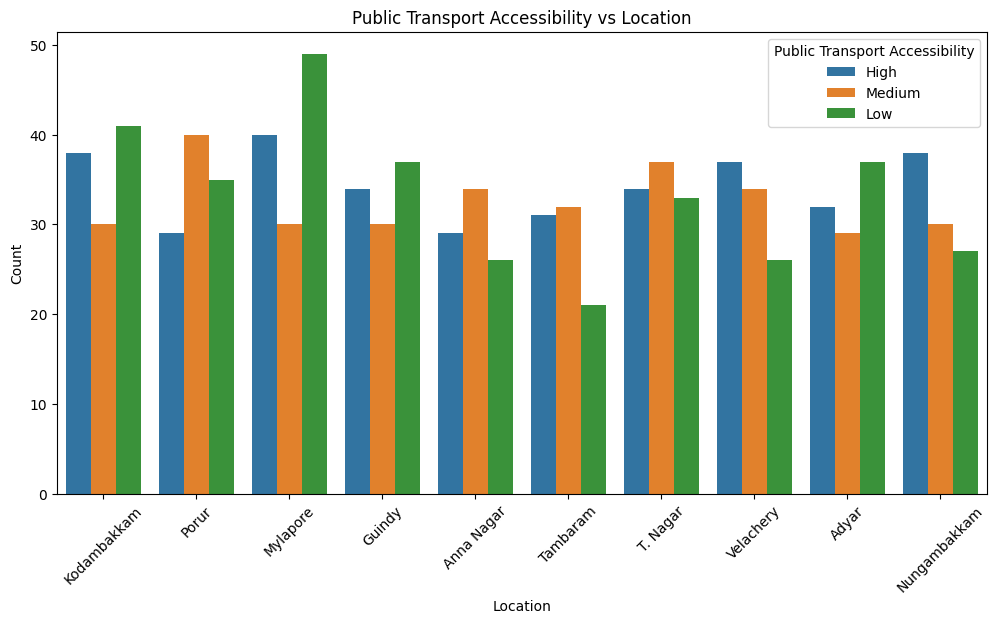

In [20]:
# 6. Public Transport Accessibility vs Location
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='Public Transport Accessibility', data=data)
plt.title('Public Transport Accessibility vs Location')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

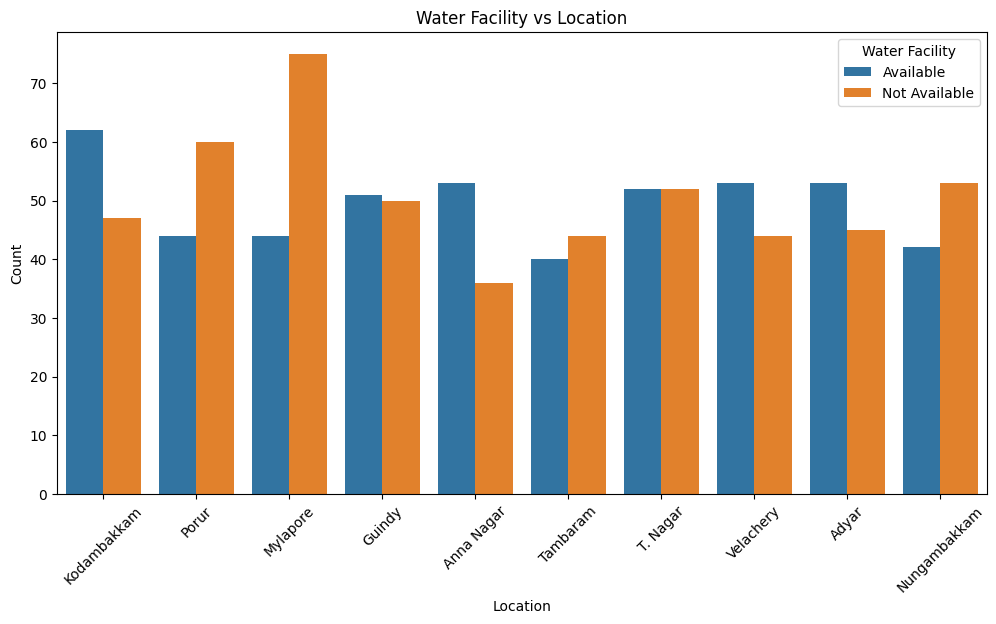

In [21]:
# 7. Water Facility vs Location
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='Water Facility', data=data)
plt.title('Water Facility vs Location')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [22]:
import folium

chennai_latitude = 13.0827
chennai_longitude = 80.2707

chennai_map = folium.Map(location=[chennai_latitude, chennai_longitude], zoom_start=12)

for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Price: {row['Total Price (Rupees)']}",
        tooltip=row['Location']
    ).add_to(chennai_map)

chennai_map


# Splitting the Data

In [33]:
data

,Location,Street,Latitude,Longitude,Area (sq ft),Year Built,Property Type,Nearby Famous Locations,Crime Rate,Public Transport Accessibility,Water Facility,Near Hospital Location,Land Price (Rupees),Building Price (Rupees),Total Price (Rupees)
0,Kodambakkam,Whites Road,13.138831,80.221579,973,1933,Condo,"Arcot Road, Vadapalani Murugan Temple",96.432760,High,Available,Bell and Sons,19207976,169289,19377265
1,Porur,RK Mutt Road,12.960715,80.065563,4171,1902,Condo,"L&T, Sri Ramachandra Hospital",67.389583,High,Available,Wang-Freeman,3816325,11898326,15714651
2,Mylapore,TTK Road,13.062025,80.192469,1747,1937,Townhouse,"Tambaram Railway Station, Tambaram Railway Sta...",61.663088,Medium,Not Available,Martinez-Smith,2366388,14875715,17242103
3,Guindy,Arcot Road,13.086460,80.265951,4328,1979,Townhouse,"Theosophical Society, Gandhi Nagar",17.754009,Low,Not Available,Cantu-Mayer,3244834,13122378,16367212
4,Anna Nagar,Besant Avenue Road,12.843140,80.241177,2523,1979,Multi Family,"Theosophical Society, Elliots Beach",84.357526,Low,Not Available,"Hurley, Schneider and Williams",19326450,11945887,31272337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Porur,Cathedral Road,13.162138,80.244438,2685,1933,Multi Family,"Kathipara Junction, Raj Bhavan",76.778570,High,Not Available,"Pollard, Parker and Kelly",17406156,12186425,29592581
996,Porur,Arcot Road,12.869042,80.145799,2506,1935,Townhouse,"Valluvar Kottam, Independence Day Park",4.044160,High,Not Available,Woodard and Sons,15775534,10547615,26323149
997,Anna Nagar,CIT Nagar,12.986204,80.153873,2389,1958,Condo,"Tambaram Railway Station, MCC College",29.951240,Medium,Available,Burke-Miller,2394354,10588214,12982568
998,Nungambakkam,Gandhi Mandapam Road,13.016150,80.120736,1421,1995,Plot,"Guindy National Park, Kathipara Junction",90.769747,Low,Available,Mahoney Ltd,3944718,16669156,3944718


In [34]:
X = data.drop(['Latitude', 'Longitude', 'Near Hospital Location', 'Land Price (Rupees)', 'Building Price (Rupees)', 'Total Price (Rupees)'], axis=1)
y = data['Total Price (Rupees)']

In [35]:
X

,Location,Street,Area (sq ft),Year Built,Property Type,Nearby Famous Locations,Crime Rate,Public Transport Accessibility,Water Facility
0,Kodambakkam,Whites Road,973,1933,Condo,"Arcot Road, Vadapalani Murugan Temple",96.432760,High,Available
1,Porur,RK Mutt Road,4171,1902,Condo,"L&T, Sri Ramachandra Hospital",67.389583,High,Available
2,Mylapore,TTK Road,1747,1937,Townhouse,"Tambaram Railway Station, Tambaram Railway Sta...",61.663088,Medium,Not Available
3,Guindy,Arcot Road,4328,1979,Townhouse,"Theosophical Society, Gandhi Nagar",17.754009,Low,Not Available
4,Anna Nagar,Besant Avenue Road,2523,1979,Multi Family,"Theosophical Society, Elliots Beach",84.357526,Low,Not Available
...,...,...,...,...,...,...,...,...,...
995,Porur,Cathedral Road,2685,1933,Multi Family,"Kathipara Junction, Raj Bhavan",76.778570,High,Not Available
996,Porur,Arcot Road,2506,1935,Townhouse,"Valluvar Kottam, Independence Day Park",4.044160,High,Not Available
997,Anna Nagar,CIT Nagar,2389,1958,Condo,"Tambaram Railway Station, MCC College",29.951240,Medium,Available
998,Nungambakkam,Gandhi Mandapam Road,1421,1995,Plot,"Guindy National Park, Kathipara Junction",90.769747,Low,Available


In [36]:
y

,Total Price (Rupees)
0,19377265
1,15714651
2,17242103
3,16367212
4,31272337
...,...
995,29592581
996,26323149
997,12982568
998,3944718


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,Location,Street,Area (sq ft),Year Built,Property Type,Nearby Famous Locations,Crime Rate,Public Transport Accessibility,Water Facility
29,Kodambakkam,Periyar EVR Road,1378,1994,Condo,"L&T, Porur Lake",6.547337,Low,Not Available
535,Anna Nagar,Greenways Road,2350,2023,Plot,"Guindy National Park, Kathipara Junction",76.619021,High,Available
695,Mylapore,Nungambakkam High Road,556,1995,Townhouse,"Arcot Road, Arcot Road",42.970805,Low,Not Available
557,Kodambakkam,Arcot Road,1381,1979,Single Family,"Pothys, Ranganathan Street",93.379820,High,Not Available
836,Guindy,Pantheon Road,2942,1909,Plot,"Luz Church Road, San Thome Basilica",94.332482,High,Not Available
...,...,...,...,...,...,...,...,...,...
106,Nungambakkam,Anna Salai,512,2004,Townhouse,"Tambaram Railway Station, Tambaram Railway Sta...",20.128060,High,Not Available
270,Anna Nagar,Haddows Road,856,2020,Plot,"Nalli Silks, Panagal Park",32.416068,Low,Not Available
860,Mylapore,Haddows Road,3771,1987,Townhouse,"DLF IT Park, Porur Lake",53.145335,Low,Not Available
435,Porur,Arcot Road,3350,1958,Townhouse,"Hindu Mission Hospital, MCC College",85.210696,Low,Not Available


In [41]:
X_test

,Location,Street,Area (sq ft),Year Built,Property Type,Nearby Famous Locations,Crime Rate,Public Transport Accessibility,Water Facility
521,Guindy,Mount Road,2806,1995,Single Family,"Loyola College, Valluvar Kottam",32.393462,Low,Available
737,Kodambakkam,Mount Road,1487,1986,Single Family,"Guindy National Park, Guindy National Park",63.185107,Medium,Not Available
740,Guindy,Haddows Road,3200,2002,Condo,"Blue Star, Shanthi Colony",77.007247,High,Not Available
660,Adyar,Nungambakkam High Road,1931,1961,Single Family,"Luz Church Road, Kapaleeshwarar Temple",22.172828,High,Not Available
411,Tambaram,Chamiers Road,3444,1941,Multi Family,"Raj Bhavan, Kathipara Junction",53.390073,High,Available
...,...,...,...,...,...,...,...,...,...
408,Tambaram,TTK Road,842,2001,Townhouse,"Theosophical Society, Adyar Bridge",40.865361,Low,Not Available
332,T. Nagar,Gandhi Mandapam Road,1404,1942,Multi Family,"MCC College, Hindu Mission Hospital",5.119970,Low,Available
208,Tambaram,RK Mutt Road,1326,1948,Single Family,"Hindu Mission Hospital, Tambaram Railway Station",42.360497,Medium,Available
613,Porur,Greenways Road,1764,1937,Condo,"Loyola College, Sterling Road",58.299056,Medium,Available


In [42]:
y_train

,Total Price (Rupees)
29,42923604
535,13785823
695,19955983
557,22860874
836,19600512
...,...
106,42745317
270,19848415
860,19932307
435,5434987


In [43]:
y_test

,Total Price (Rupees)
521,21885928
737,29401518
740,12095723
660,24766360
411,11491209
...,...
408,25714963
332,19790076
208,16685179
613,14042678


In [45]:
categorical_features = ['Location', 'Street', 'Property Type', 'Nearby Famous Locations', 'Public Transport Accessibility', 'Water Facility']
numerical_features = ['Area (sq ft)', 'Year Built', 'Crime Rate']

In [46]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [48]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Or any other regression model
])

In [49]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Area (sq ft)', 'Year Built',
                                                   'Crime Rate']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Street',
                                                   'Property Type',
                                                   'Nearby Famous Locations',
                                                   'Public Transport '
                                                   'Accessibility',
                                                   'Water Facility'])])),
                ('regressor', LinearRegression())])

In [50]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Area (sq ft)', 'Year Built',
                                                   'Crime Rate']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Street',
                                                   'Property Type',
                                                   'Nearby Famous Locations',
                                                   'Public Transport '
                                                   'Accessibility',
                                                   'Water Facility'])])),
                ('regressor', LinearRegression())])

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred

array([31664573.09734713, 25859500.5067501 , 30743841.46088046,
       31504730.23695258, 30933786.15237621, 11635523.44294148,
       12372697.98451161, 33550141.97880506, 29712081.97330657,
       13380260.45556732, 27657317.08881886, 16468180.92064809,
       11827887.84628037, 23493220.37521289, 29734642.88002722,
       27152663.94353195, 26367838.31704091, 24902723.44918624,
       29861133.44667037, 27279050.97054124, 19848779.82953085,
       22454240.78502546, 24572302.32825271, 31711903.03318367,
       18219825.19989439, 30876655.88732994, -5030248.30903517,
       36671373.75678338, 22750823.50119247, 23431796.3634214 ,
       12009903.17190032, 25193388.93648857, 31808457.25125556,
       16418291.91232508, 26063233.75048009, 27688239.00584732,
       19611530.17391085, 22905517.47082255, 26837115.37515318,
       25698746.08332145, 11747645.08376073, 31160788.00010843,
       37235136.74080819, 28793707.16709655, 17266484.11525904,
       14941686.3119141 , -2589975.63748

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

- Accuracy is not a valid metric for regression problems.
- You are using LinearRegression which is for regression problems, not classification problems.
- Instead of accuracy, you already have calculated Mean Squared Error and  R-squared which are valid metrics for regression problems.

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 115790197718901.06
R-squared: -0.050111118312465175


In [56]:
X_test

,Location,Street,Area (sq ft),Year Built,Property Type,Nearby Famous Locations,Crime Rate,Public Transport Accessibility,Water Facility
521,Guindy,Mount Road,2806,1995,Single Family,"Loyola College, Valluvar Kottam",32.393462,Low,Available
737,Kodambakkam,Mount Road,1487,1986,Single Family,"Guindy National Park, Guindy National Park",63.185107,Medium,Not Available
740,Guindy,Haddows Road,3200,2002,Condo,"Blue Star, Shanthi Colony",77.007247,High,Not Available
660,Adyar,Nungambakkam High Road,1931,1961,Single Family,"Luz Church Road, Kapaleeshwarar Temple",22.172828,High,Not Available
411,Tambaram,Chamiers Road,3444,1941,Multi Family,"Raj Bhavan, Kathipara Junction",53.390073,High,Available
...,...,...,...,...,...,...,...,...,...
408,Tambaram,TTK Road,842,2001,Townhouse,"Theosophical Society, Adyar Bridge",40.865361,Low,Not Available
332,T. Nagar,Gandhi Mandapam Road,1404,1942,Multi Family,"MCC College, Hindu Mission Hospital",5.119970,Low,Available
208,Tambaram,RK Mutt Road,1326,1948,Single Family,"Hindu Mission Hospital, Tambaram Railway Station",42.360497,Medium,Available
613,Porur,Greenways Road,1764,1937,Condo,"Loyola College, Sterling Road",58.299056,Medium,Available


In [ ]:
print("***********************************************Prediction of Price*****************************************************")

location = input("Enter the location: ")
street = input("Enter the street: ")
area = int(input("Enter the area (sq ft): "))
year_built = int(input("Enter the year built: "))
property_type = input("Enter the property type: ")
nearby_locations = input("Enter nearby famous locations (comma-separated): ")
crime_rate = float(input("Enter the crime rate: "))
public_transport = input("Enter public transport accessibility (High, Medium, Low): ")
water_facility = input("Enter water facility (Available, Not Available): ")

user_input_df = pd.DataFrame({
    'Location': [location],
    'Street': [street],
    'Area (sq ft)': [area],
    'Year Built': [year_built],
    'Property Type': [property_type],
    'Nearby Famous Locations': [nearby_locations],
    'Crime Rate': [crime_rate],
    'Public Transport Accessibility': [public_transport],
    'Water Facility': [water_facility]
})

predicted_price = model.predict(user_input_df)

print("Predicted Price (Rupees):","(Rs)",predicted_price[0])


Enter the location: Guindy
Enter the street: Mount Road
Enter the area (sq ft): 2806
Enter the year built: 1995
Enter the property type: Single Family
Enter nearby famous locations (comma-separated): Loyola College, Valluvar Kottam
Enter the crime rate: 32.393462
Enter public transport accessibility (High, Medium, Low): Low
Enter water facility (Available, Not Available): Available
Predicted Price (Rupees): 31664573.09717379 Rs


In [ ]:
import joblib


model_filename = 'property_price_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

loaded_model = joblib.load(model_filename)

predicted_price = loaded_model.predict(user_input_df)
print("Predicted Price (Rupees):", "(Rs)", predicted_price[0])


Model saved to property_price_model.pkl
Predicted Price (Rupees): (Rs) 31664573.09717379


In [ ]:
# prompt: integrate the map and this model for price prediction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import ipywidgets as widgets
from IPython.display import display

# ... (Your existing code for data loading, EDA, and model training)

# Function to predict price based on user input
def predict_price(location, street, area, year_built, property_type, nearby_locations, crime_rate, public_transport, water_facility):
    user_input_df = pd.DataFrame({
        'Location': [location],
        'Street': [street],
        'Area (sq ft)': [area],
        'Year Built': [year_built],
        'Property Type': [property_type],
        'Nearby Famous Locations': [nearby_locations],
        'Crime Rate': [crime_rate],
        'Public Transport Accessibility': [public_transport],
        'Water Facility': [water_facility]
    })

    predicted_price = loaded_model.predict(user_input_df)
    return predicted_price[0]

# Create input widgets
location_widget = widgets.Dropdown(
    options=data['Location'].unique(),
    description='Location:',
)
street_widget = widgets.Text(
    description='Street:',
)
area_widget = widgets.IntSlider(
    value=2000,
    min=500,
    max=5000,
    step=100,
    description='Area (sq ft):',
)
year_built_widget = widgets.IntSlider(
    value=2000,
    min=1900,
    max=2024,
    step=1,
    description='Year Built:',
)
property_type_widget = widgets.Dropdown(
    options=['Single Family', 'Condo', 'Townhouse', 'Multi Family', 'Plot'],
    description='Property Type:',
)
nearby_locations_widget = widgets.Text(
    description='Nearby Locations:',
)
crime_rate_widget = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=0.1,
    description='Crime Rate:',
)
public_transport_widget = widgets.Dropdown(
    options=['High', 'Medium', 'Low'],
    description='Public Transport:',
)
water_facility_widget = widgets.Dropdown(
    options=['Available', 'Not Available'],
    description='Water Facility:',
)

# Function to update map and display prediction
def update_map_and_prediction(change):
    predicted_price = predict_price(
        location_widget.value,
        street_widget.value,
        area_widget.value,
        year_built_widget.value,
        property_type_widget.value,
        nearby_locations_widget.value,
        crime_rate_widget.value,
        public_transport_widget.value,
        water_facility_widget.value
    )

    # Update the map (you'll need to customize this based on your map implementation)
    # For example, you could add a marker at the selected location with the predicted price as a popup.

    print("Predicted Price (Rupees):", "(Rs)", predicted_price)

# Attach the update function to widget changes
for widget in [location_widget, street_widget, area_widget, year_built_widget, property_type_widget,
               nearby_locations_widget, crime_rate_widget, public_transport_widget, water_facility_widget]:
    widget.observe(update_map_and_prediction, names='value')

# Display the widgets
display(location_widget, street_widget, area_widget, year_built_widget, property_type_widget,
        nearby_locations_widget, crime_rate_widget, public_transport_widget, water_facility_widget)

# Initialize the map
chennai_latitude = 13.0827
chennai_longitude = 80.2707
chennai_map = folium.Map(location=[chennai_latitude, chennai_longitude], zoom_start=12)

# Display the map
chennai_map
